In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

In [3]:
# Female, male
colors = ['#5175bc', '#d23a47']

In [4]:
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

# Load tables

In [27]:
five = pd.read_csv('../../data/within_five_years.csv')

In [37]:
prop = pd.read_csv('../../data/authors_estimation_propensity_score_SC_collaborators.csv')

In [39]:
prop = prop[prop['SC_collab_first5']==1]

In [112]:
articles = pd.read_csv('../../data/evolution_articles.csv')

In [113]:
articles = articles[articles['author'].isin(prop['shortid'].unique())]

In [120]:
cites = pd.read_csv('../../data/evolution_cites.csv')

In [121]:
cites = cites[cites['author'].isin(prop['shortid'].unique())]

In [44]:
people = pd.read_csv('../../data/processed/people.csv')

In [45]:
articles['author'].nunique()

1288

In [46]:
cites['author'].nunique()

1288

In [47]:
uniform_data = np.random.rand(10, 12)

In [127]:
cols = ['author'] + [f't{i}' for i in range(-5, 6)]

In [128]:
cites = cites.loc[:, cols]

In [129]:
articles = articles.loc[:, cols]

In [130]:
M = cites.fillna(0).values[:,1:]

In [131]:
H = articles.fillna(0).values[:, 1:]

In [132]:
arr = articles.iloc[:, 1:-1].values.T

In [133]:
arr_c = cites.iloc[:, 1:-1].values.T

In [134]:
np.mean((~np.isnan(arr)).argmax(axis=0))

1.7833850931677018

In [135]:
np.mean((~np.isnan(np.flip(arr, axis=0))).argmin(axis=0))

2.6630434782608696

In [136]:
arr_c.shape

(10, 1288)

In [137]:
np.nanmean(arr_c[:5])

2.8240409207161123

In [138]:
np.nanmean(arr_c[6:])

10.311001712328768

In [139]:
np.nanmean(arr[:5])

1.8692952499223843

In [140]:
np.nanmean(arr[6:])

2.348568426582611

In [2]:
2.3 / 1.8

1.2777777777777777

In [141]:
np.nanmean(arr_c[6:]) / np.nanmean(arr_c[:5])

3.651151665930582

In [142]:
np.nanmean(arr[6:]) / np.nanmean(arr[:5])

1.256392443451684

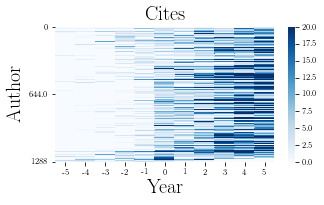

In [143]:
width = 345 / 2
fig, ax = plt.subplots(1, 1, figsize=set_size(width, fraction=2))

g = sns.matrix.heatmap(M.astype(int), vmax=20, cmap='Blues', ax=ax)
g.set_xticklabels(range(-5, 6))
g.set_title('Cites', fontsize=20)
g.set_xlabel('Year', fontsize=20);

g.set_yticks([0, M.shape[0] / 2, M.shape[0]])
g.set_yticklabels([0, M.shape[0] / 2, M.shape[0]])
g.set_ylabel('Author', fontsize=20)

fig.tight_layout()
fig.savefig('../../figures/heatmap_cites.png', dpi=300)

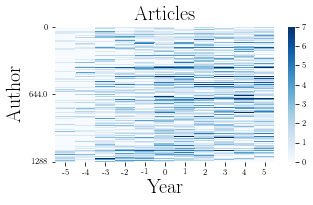

In [144]:
width = 345 / 2
fig, ax = plt.subplots(1, 1, figsize=set_size(width, fraction=2))

g = sns.matrix.heatmap(H.astype(int), vmax=7, cmap='Blues')
g.set_xticklabels(range(-5, 6))
g.set_title('Articles', fontsize=20)
g.set_xlabel('Year', fontsize=20)

g.set_yticks([0, M.shape[0] / 2, M.shape[0]])
g.set_yticklabels([0, M.shape[0] / 2, M.shape[0]])
g.set_ylabel('Author', fontsize=20)

fig.tight_layout()

fig.savefig('../../figures/heatmap_articles.png', dpi=300)

In [145]:
people = people.rename(columns={'Short-Id': 'author'})

In [146]:
articles = pd.merge(articles, people[['author', 'gender']])

In [147]:
cites = pd.merge(cites, people[['author', 'gender']])

In [148]:
articles_melt = articles.groupby('gender').mean().reset_index().melt(id_vars='gender')

In [149]:
cites_melt = cites.groupby('gender').mean().reset_index().melt(id_vars='gender')

<ipython-input-153-bc436d0f6977>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(range(-5, 6));


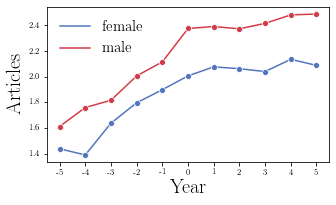

In [153]:
width = 345 / 2
fig, ax = plt.subplots(1, 1, figsize=set_size(width, fraction=2))

with sns.color_palette(colors):
    g = sns.lineplot(data=articles_melt, x='variable', y='value', hue='gender', marker='o',
                hue_order=['female', 'male'], ax=ax)
g.set_xticklabels(range(-5, 6));
g.set_xlabel('Year', fontsize=20)
g.set_ylabel('Articles', fontsize=20)

fig.tight_layout()
g.legend(frameon=False, fontsize=15)

fig.savefig('../../figures/mean_articles_evol.pdf')

<ipython-input-154-8d92ea3efea2>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(range(-5, 6));


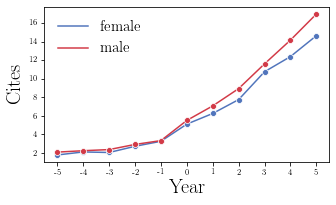

In [154]:
width = 345 / 2
fig, ax = plt.subplots(1, 1, figsize=set_size(width, fraction=2))

with sns.color_palette(colors):
    g = sns.lineplot(data=cites_melt, x='variable', y='value', hue='gender', marker='o',
                hue_order=['female', 'male'], ax=ax)
    
g.set_xticklabels(range(-5, 6));
g.set_xlabel('Year', fontsize=20)
g.set_ylabel('Cites', fontsize=20)

fig.tight_layout()
g.legend(frameon=False, fontsize=15)

fig.savefig('../../figures/mean_cites_evol.pdf')